In [1]:
import json
import glob
from tqdm import tqdm
from scipy.spatial import distance


# image registration [0630]

In [ ]:
img_align_results_dir = ""
pre = {}

def job(js):
    data = json.load(open(js, 'r'))
    for i in data["alignment_results"].keys():
        tem_path = data["alignment_results"][i]["template_path"]
        ##only check existed template
        if  tem_path in gt_dict[imid].keys():
            ratio = data["alignment_results"][i]["matched_features"]["mkpts_ratio2template"]
            if imid not in pre.keys():
                pre[imid] = {}
            ##condition
            if ratio < 0.1:
                mark = 0
            else:
                mark = 1
            pre[imid][tem_path] = mark

for imid in tqdm(gt_dict.keys()):
    data = json.load(open(f"/data/home/yanghanlong/results/iar_on_rule/cleaned_dataset/6w_warped_sam/{imid}_result.json", 'r'))
    for i in data["alignment_results"].keys():
        tem_path = data["alignment_results"][i]["template_path"]
        ##only check existed template
        if  tem_path in gt_dict[imid].keys():
            ratio = data["alignment_results"][i]["matched_features"]["mkpts_ratio2template"]
            if imid not in pre.keys():
                pre[imid] = {}
            ##condition
            if ratio < 0.1:
                mark = 0
            else:
                mark = 1
            pre[imid][tem_path] = mark
##check if sum is right
check_sum(pre)

In [7]:
dict((('template path',1),))

{'template path': 1}

In [8]:
dict((('sample path',('template path',1)),))

{'sample path': ('template path', 1)}

In [2]:
def check_sum(d):
    k = 0
    for i in d.keys():
        k += len(d[i].keys())
    print(f"the sum of the dict is {k}")   
    return k 

In [47]:
##no bad case in testset, so try in trainset
with open("/data/home/yanghanlong/trainset/test.json", 'r') as f:
    d = json.load(f)
d = d["data"]
gt_dict = {}
for i in d:
    if i["image_id"] not in gt_dict.keys():
        gt_dict[i["image_id"]] = {}
    gt_dict[i["image_id"]][i["template_path"]] = i["isGT"]
##check if sum is right
check_sum(gt_dict)
print(list(gt_dict.items())[0:3])
pre = {}
for imid in tqdm(gt_dict.keys()):
    data = json.load(open(f"/data/home/yanghanlong/results/iar_on_rule/cleaned_dataset/6w_warped_sam/{imid}_result.json", 'r'))
    for i in data["alignment_results"].keys():
        tem_path = data["alignment_results"][i]["template_path"]
        ##only check existed template
        if  tem_path in gt_dict[imid].keys():
            ratio = data["alignment_results"][i]["matched_features"]["mkpts_ratio2template"]
            if imid not in pre.keys():
                pre[imid] = {}
            ##condition
            if ratio < 0.1:
                mark = 0
            else:
                mark = 1
            pre[imid][tem_path] = mark
##check if sum is right
check_sum(pre)

the sum of the dict is 20000
[('3ad880bb-355b-4fa3-9082-8310ff67f104', {'homework-prod/14845369280963890pic.jpg': 1}), ('f24106a4-03c1-4695-859a-f04c60e0c0c1', {'homework-prod/14946561013468270pic.jpg': 0, 'homework-prod/14946557165748454pic.jpg': 1}), ('b7712d57-3274-42e0-a5fb-0d0e3e3d1922', {'homework-prod/15364317105783450pic.jpg': 0, 'homework-pdf/production/DesignWorkPageImage_56091__2022_12_17_06_50_06_c4197e.png': 1})]


100%|██████████| 18095/18095 [01:09<00:00, 258.57it/s]


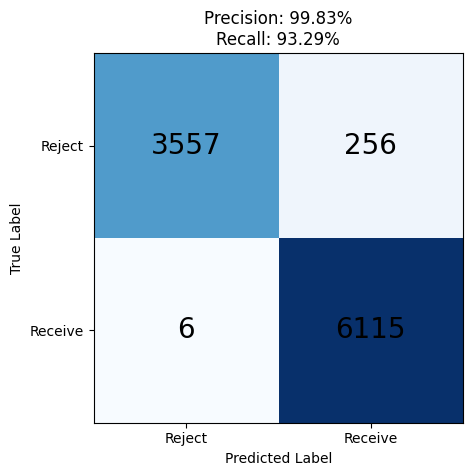

In [48]:
##visualization 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y_gt = []
y_pre = []
for i in pre:
    for j in pre[i]:
        y_gt.append(gt_dict[i][j])
        y_pre.append(pre[i][j])
cm = confusion_matrix(y_gt, y_pre)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y_gt = []
y_pre = []
for i in pre:
    for j in pre[i]:
        y_gt.append(gt_dict[i][j])
        y_pre.append(pre[i][j])
cm = confusion_matrix(y_gt, y_pre)
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')
tick_marks = np.arange(2)
ax.set_xticks(tick_marks, ['Reject', 'Receive'])
ax.set_yticks(tick_marks, ['Reject', 'Receive'])
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
precison = cm[0, 0] / (cm[0, 0] + cm[1, 0])
recall = cm[0, 0] / (cm[0, 0] + cm[0, 1])
ax.set_title(f"Precision: {precison:.2%}\nRecall: {recall:.2%}")
for i in range(2):
    for j in range(2):
        text = ax.text(j, i, cm[i, j],ha="center", va="center", color="black", fontsize = 20)

In [4]:
##save all gt in gt_dict from testset/test.json
##dict format: gt_dict["image_id"]["template_path"] = 0/1
with open("/data/home/yanghanlong/data/img_align_on_model/eval_iar/testset/test.json", 'r') as f:
    d = json.load(f)
d = d["data"]
gt_dict = {}
for i in d:
    if i["image_id"] not in gt_dict.keys():
        gt_dict[i["image_id"]] = {}
    gt_dict[i["image_id"]][i["template_path"]] = i["isGT"]
##check if sum is right
check_sum(gt_dict)
print(list(gt_dict.items())[0:3])

the sum of the dict is 5855
[('0293204f-a2b1-4c49-99d0-89d418ab13aa', {'6_2023_01_29_14_22_16_8f9e2f.png': 1}), ('15225171-a74a-44e1-81a1-878447a5a687', {'420155572348702pic.jpg': 1}), ('5aedacac-b2d9-4b1f-8c37-8e4b7e5f7ae7', {'14843504874283381pic.jpg': 1})]


In [5]:
##generate pre(dict) by ratio < 0.1
pre = dict()
fail = []
for imid in tqdm(gt_dict.keys()):
    data = json.load(open(f"/data/home/yanghanlong/results/image_align/image_retrieval_for_eval_ia/{imid}_result.json", 'r'))
    for i in data["alignment_results"].keys():
        tem_path = data["alignment_results"][i]["template_path"]
        ##only check existed template
        if  tem_path in gt_dict[imid].keys():
            ##ratio
            ratio = data["alignment_results"][i]["matched_features"]["mkpts_ratio2template"]
            ##modified ratio
            mkpts_conf = data["alignment_results"][i]["matched_features"]["mkpts_conf"]
            template_kpts_count = data["alignment_results"][i]["template_features"]["template_kpts_count"]
            modified_ratio = (len(mkpts_conf) - 10) / template_kpts_count
            ##average confidence
            mkpts_conf = data["alignment_results"][i]["matched_features"]["mkpts_conf"]
            aver_conf = sum(mkpts_conf) / len(mkpts_conf)
            ##average weighted distance
            sample_mkpts = data["alignment_results"][i]["matched_features"]["sample_mkpts"]
            template_mkpts = data["alignment_results"][i]["matched_features"]["template_mkpts"]
            dist = 0; weighted_dist = 0
            for j in range(len(sample_mkpts)):
                dist += distance.euclidean(sample_mkpts[j], template_mkpts[j])
                weighted_dist += distance.euclidean(sample_mkpts[j], template_mkpts[j])*mkpts_conf[j]
                dist = dist / (j+1); weighted_dist = weighted_dist / (j+1); 
            
            if imid not in pre.keys():
                pre[imid] = {}
            ##condition!!=======================
            if ratio < 0.1:
                mark = 0
            else:
                mark = 1
            pre[imid][tem_path] = mark
            ##==================================
        else:
            fail.append((imid, tem_path))

##check if sum is right
a = check_sum(pre)

100%|██████████| 5000/5000 [00:47<00:00, 105.33it/s]

the sum of the dict is 5553


In [7]:
##find badcase
output = []
for i in pre:
    for j in pre[i]:
        output.append(f"image name:{i}	template_path: {j} target: {gt_dict[i][j]} predicted: {pre[i][j]}")
        # if gt_dict[i][j] == 1 and pre[i][j] == 0:
        #     with open("/data/home/yanghanlong/rule_ratio_0.1_FP.txt", 'a') as f:
        #         f.write(f"image_id:{i} template_path:{j}")
        #         f.write('\n')
        #     # print((i, j))
with open("/data/home/yanghanlong/results/iar_on_rule/eval_iar_5k/all_results_rule.txt", 'w') as f:
    f.writelines('\n'.join(output))
        

In [5]:
##visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y_gt = []
y_pre = []
for i in pre:
    for j in pre[i]:
        y_gt.append(gt_dict[i][j])
        y_pre.append(pre[i][j])
cm = confusion_matrix(y_gt, y_pre)



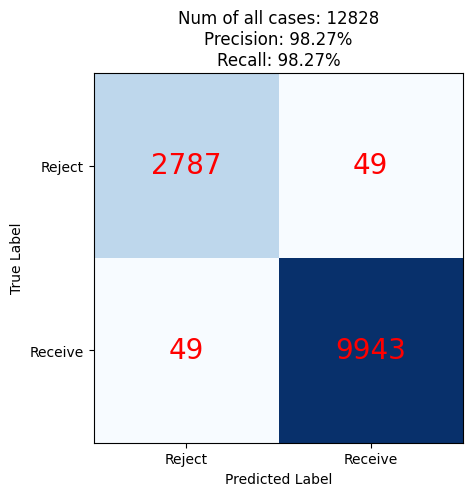

In [8]:
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')
tick_marks = np.arange(2)
ax.set_xticks(tick_marks, ['Reject', 'Receive'])
ax.set_yticks(tick_marks, ['Reject', 'Receive'])
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
num_allcases = cm.sum()
precison = cm[0, 0] / (cm[0, 0] + cm[1, 0])
recall = cm[0, 0] / (cm[0, 0] + cm[0, 1])
ax.set_title(f"Num of all cases: {num_allcases}\nPrecision: {precison:.2%}\nRecall: {recall:.2%}")
for i in range(2):
    for j in range(2):
        text = ax.text(j, i, cm[i, j],ha="center", va="center", color="red", fontsize = 20)

the sum of the dict is 20000


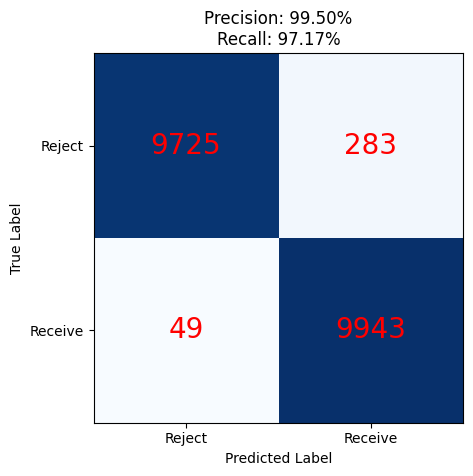

In [71]:
##not use any more
##for rule scheme, cm[0, 0] += img align reject num
cm[0,0] += (check_sum(gt_dict) - cm.sum())
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')
tick_marks = np.arange(2)
ax.set_xticks(tick_marks, ['Reject', 'Receive'])
ax.set_yticks(tick_marks, ['Reject', 'Receive'])
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
precison = cm[0, 0] / (cm[0, 0] + cm[1, 0])
recall = cm[0, 0] / (cm[0, 0] + cm[0, 1])
ax.set_title(f"Precision: {precison:.2%}\nRecall: {recall:.2%}")
for i in range(2):
    for j in range(2):
        text = ax.text(j, i, cm[i, j],ha="center", va="center", color="red", fontsize = 20)